In [2]:
our_model_kiba_file = "../../data/elia/atc-kiba-predictions.txt"
baseline_model_kiba_file = "../../data/elia/baseline-kiba-predictions.txt"

In [3]:
import pandas as pd

our_model_kiba = pd.read_csv(our_model_kiba_file)
baseline_model_kiba = pd.read_csv(baseline_model_kiba_file)

In [4]:
our_model_kiba

,chemid,pid,y_hat,y
0,CHEMBL1984586,P36888,11.970232,14.400163
1,CHEMBL2000029,P49760,11.958051,12.399998
2,CHEMBL1967720,P49841,11.965219,11.400001
3,CHEMBL1967211,Q9UM73,11.955622,10.100000
4,CHEMBL1975490,P48729,11.951066,12.699998
...,...,...,...,...
19704,CHEMBL1997023,Q13976,11.967000,11.800000
19705,CHEMBL1996155,Q05655,11.955944,11.200000
19706,CHEMBL1614705,Q16620,11.965087,11.400001
19707,CHEMBL1996208,O00444,11.973084,11.500000


In [5]:
baseline_model_kiba

,chemid,pid,y_hat,y
0,CHEMBL1984586,P36888,12.293932,14.400163
1,CHEMBL2000029,P49760,12.272488,12.399998
2,CHEMBL1967720,P49841,12.206654,11.400001
3,CHEMBL1967211,Q9UM73,12.229422,10.100000
4,CHEMBL1975490,P48729,12.134521,12.699998
...,...,...,...,...
19704,CHEMBL1997023,Q13976,12.226660,11.800000
19705,CHEMBL1996155,Q05655,12.188390,11.200000
19706,CHEMBL1614705,Q16620,12.317738,11.400001
19707,CHEMBL1996208,O00444,12.333213,11.500000


0.042634927765746504
17.012052988363205
-191.70585022664565
0.7332302018399216
R-squared: 0.042634927765746504
Mean squared error: 0.7332302018399216


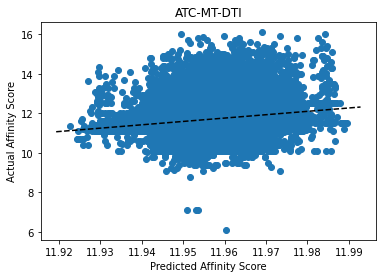

In [25]:
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import rc
import matplotlib.lines as mlines
import scipy.stats
from sklearn.metrics import mean_squared_error

'''
fig = plt.figure()
plt.plot(accs,'Dg-',zorder=30, linewidth=2, markersize=6)
plt.xticks(np.arange(8), [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000])

plt.ylabel(y_lab, fontsize=16, fontweight='bold', family='Arial')
plt.xlabel(x_lab, fontsize=16, fontweight='bold', family='Arial')



'''


def r_square_plot(x,y,title):
    
    # rsquare
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    rsquare = r_value**2
    
    print(rsquare)
    print(slope)
    print(intercept)
    
    # mse
    mse = mean_squared_error(x,y)
    print(mse)
    
    # plot x vs y
    fig = plt.figure()
    plt.scatter(x,y)
    
    """
    Plot a line from slope and intercept
    https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
    """
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--k')
    
    
    plt.ylabel("Actual Affinity Score")
    plt.xlabel("Predicted Affinity Score")
    plt.title(title)
    
    '''
    plt.ylabel("Actual Affinity Score",fontsize=16, fontweight='bold', family='Arial')
    plt.xlabel("Predicted Affinity Score",fontsize=16, fontweight='bold', family='Arial')
    plt.title(title,fontsize=20, fontweight='bold', family='Arial')
    ax = gca()
    ax.tick_params(direction='in', length=6, width=2)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontproperties('Arial')
        tick.label1.set_fontsize(12)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontproperties('Arial')
        tick.label1.set_fontsize(12)
        tick.label1.set_fontweight('bold')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    '''
    return rsquare, mse

rsquare, mse = r_square_plot(our_model_kiba['y_hat'],our_model_kiba['y'],"ATC-MT-DTI")
print("R-squared: "+str(rsquare))
print("Mean squared error: "+str(mse))

0.003189349378591116
0.7037547599195352
3.0976931962048972
0.9604096723765186
R-squared: 0.003189349378591116
Mean squared error: 0.9604096723765186


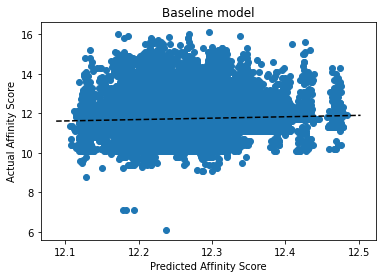

In [24]:
rsquare, mse = r_square_plot(baseline_model_kiba['y_hat'],baseline_model_kiba['y'],"Baseline model")
print("R-squared: "+str(rsquare))
print("Mean squared error: "+str(mse))

In [8]:
min_yhat = min(our_model_kiba['y_hat'])
max_yhat = max(our_model_kiba['y_hat'])
avg_yhat = sum(our_model_kiba['y_hat'])/len(our_model_kiba['y_hat'])

print("Range, average value: "+str((min_yhat,max_yhat))+", "+str(avg_yhat))

Range, average value: (11.922647999999999, 11.989483), 11.957702696077934


In [9]:
min_yhat = min(baseline_model_kiba['y_hat'])
max_yhat = max(baseline_model_kiba['y_hat'])
avg_yhat = sum(baseline_model_kiba['y_hat'])/len(baseline_model_kiba['y_hat'])

print("Range, average value: "+str((min_yhat,max_yhat))+", "+str(avg_yhat))

Range, average value: (12.106459, 12.4836), 12.250756872900707


In [10]:
min_yhat = min(baseline_model_kiba['y'])
max_yhat = max(baseline_model_kiba['y'])
avg_yhat = sum(baseline_model_kiba['y'])/len(baseline_model_kiba['y'])

print("Range, average value: "+str((min_yhat,max_yhat))+", "+str(avg_yhat))

Range, average value: (6.1, 16.1), 11.71922165812573


In [ ]:
def histogram(y_pred_vals, y_actual_vals, title):
    
    
    
    import matplotlib.pyplot as plt
def histogram(d):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=d, bins=np.arange(1,13), color='#0504aa',
                            alpha=0.7, rwidth=0.85,align='left')
    #n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
    #                        alpha=0.7, rwidth=0.85)
    #print(bins)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of occurences of drug')
    plt.ylabel('Frequency')
    plt.title('Histogram of drug occurences')
    plt.xticks(np.arange(1, 12, step=1))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.ylim(ymax=400)
    plt.show()
    print("Histogram is truncated for first bin which achieves a frequency of "+str(int(maxfreq)))
    
histogram(drug_freq)   

In [ ]:
#https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2